In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import plotly.graph_objects as go

import os
import warnings
warnings.filterwarnings("ignore")\


pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress=True)
pd.set_option("display.max_rows", None)
pd.options.display.max_columns = None

In [96]:
df = pd.read_csv("refined_5.csv")

In [97]:
first_20 = df.head(20)

In [98]:
first_20.to_csv('first_20.csv', index=False)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8587 entries, 0 to 8586
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incident_id                 8587 non-null   object 
 1   victim                      8252 non-null   object 
 2   v_country                   8503 non-null   object 
 3   code                        8503 non-null   object 
 4   country                     8442 non-null   object 
 5   v_state                     5857 non-null   object 
 6   industry                    8450 non-null   object 
 7   employee_count              5877 non-null   object 
 8   revenue                     513 non-null    float64
 9   incident_year               8587 non-null   int64  
 10  notification_year           6071 non-null   float64
 11  security_attribute          8587 non-null   object 
 12  compromise_variety_1        8548 non-null   object 
 13  compromise_variety_2        449 n

In [100]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [101]:
missing_values_table(df)

Your selected dataframe has 31 columns.
There are 28 columns that have missing values.


,Missing Values,% of Total Values
total_monetary_impact,8247,96.00
compromise_variety_2,8138,94.80
revenue,8074,94.00
t_exfiltration_hours,7971,92.80
t_containment_hours,7849,91.40
t_compromise_hours,7723,89.90
confidence,6492,75.60
t_discovery_hours,6285,73.20
state_nonstate,5054,58.90
confidentiality_data_total,3755,43.70


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8587 entries, 0 to 8586
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incident_id                 8587 non-null   object 
 1   victim                      8252 non-null   object 
 2   v_country                   8503 non-null   object 
 3   code                        8503 non-null   object 
 4   country                     8442 non-null   object 
 5   v_state                     5857 non-null   object 
 6   industry                    8450 non-null   object 
 7   employee_count              5877 non-null   object 
 8   revenue                     513 non-null    float64
 9   incident_year               8587 non-null   int64  
 10  notification_year           6071 non-null   float64
 11  security_attribute          8587 non-null   object 
 12  compromise_variety_1        8548 non-null   object 
 13  compromise_variety_2        449 n

In [103]:
df = df[~(df.state_nonstate.isnull())]

In [104]:
df.state_nonstate.value_counts()



nonstate            3250
state-affiliated     283
Name: state_nonstate, dtype: int64

In [105]:
3250/283

11.484098939929329

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 0 to 8586
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incident_id                 3533 non-null   object 
 1   victim                      3250 non-null   object 
 2   v_country                   3451 non-null   object 
 3   code                        3451 non-null   object 
 4   country                     3451 non-null   object 
 5   v_state                     1962 non-null   object 
 6   industry                    3452 non-null   object 
 7   employee_count              2286 non-null   object 
 8   revenue                     190 non-null    float64
 9   incident_year               3533 non-null   int64  
 10  notification_year           2680 non-null   float64
 11  security_attribute          3533 non-null   object 
 12  compromise_variety_1        3513 non-null   object 
 13  compromise_variety_2        371 n

In [107]:
df.isnull().sum()

incident_id                      0
victim                         283
v_country                       82
code                            82
country                         82
v_state                       1571
industry                        81
employee_count                1247
revenue                       3343
incident_year                    0
notification_year              853
security_attribute               0
compromise_variety_1            20
compromise_variety_2          3162
confidentiality_state          847
data_type                      641
confidence                    2093
data_disclosure                544
action                           4
action_variety                 685
action_vector                  885
state_nonstate                   0
asset_group                    271
asset_variety_1                525
confidentiality_data_total    2034
t_impact_hours                 341
t_discovery_hours             2605
t_containment_hours           3132
t_exfiltration_hours

# EDA

In [108]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
revenue,190.00,13036085836.84,47070335785.94,85000.00,23842500.00,576700000.00,4655000000.00,469000000000.00
incident_year,3533.00,2014.19,2.80,1994.00,2013.00,2014.00,2016.00,2020.00
notification_year,2680.00,2014.33,2.86,1994.00,2013.00,2014.00,2016.00,2102.00
confidentiality_data_total,1499.00,9752364.94,117860609.29,0.00,20.00,850.00,20113.50,4000000000.00
t_impact_hours,3192.00,17.83,528.07,0.00,0.00,0.00,0.00,26400.00
t_discovery_hours,928.00,6590.17,17009.34,0.00,11.00,336.00,4320.00,262800.00
t_containment_hours,401.00,1256.52,7869.42,0.00,24.00,106.00,156.00,87600.00
t_exfiltration_hours,459.00,72.48,682.65,0.00,0.00,0.00,0.00,8760.00
t_compromise_hours,596.00,57.21,503.58,0.00,0.00,0.00,0.00,8760.00
total_monetary_impact,194.00,33102104.51,136293342.32,300.00,33293.25,200000.00,1147357.25,1445200000.00


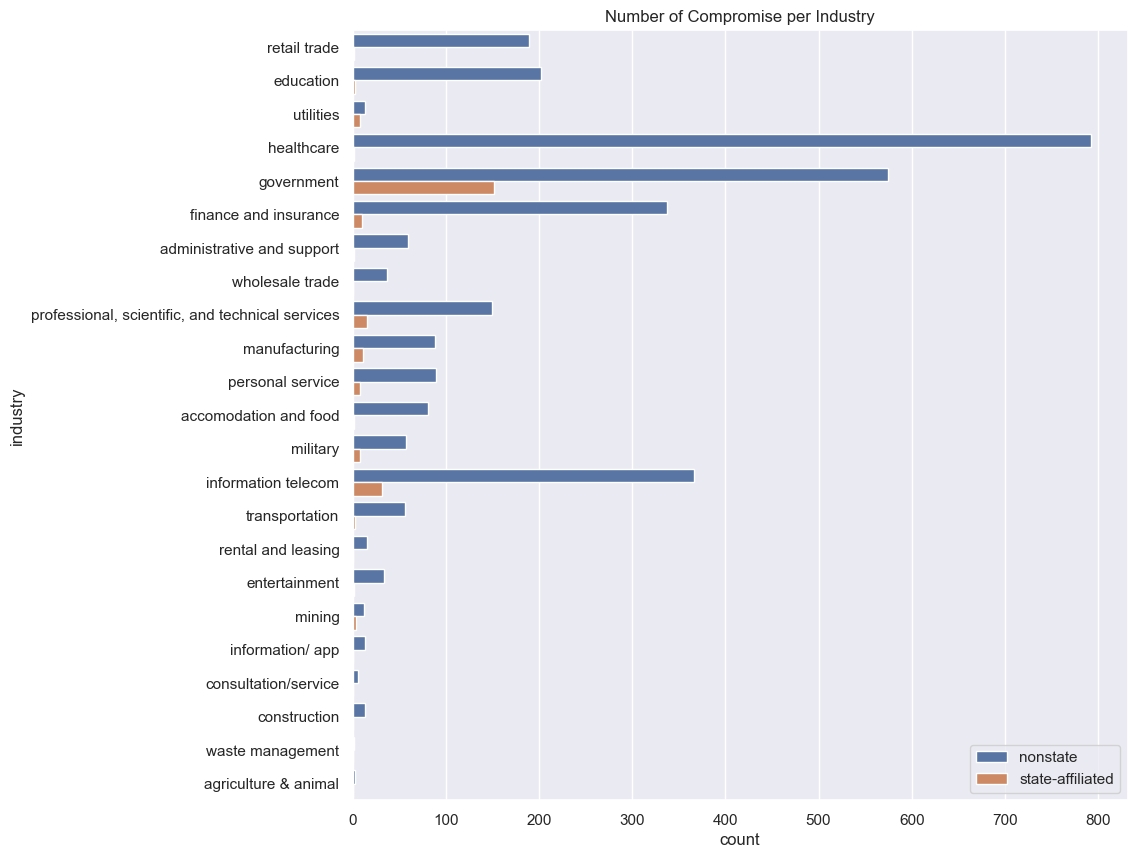

In [109]:
plt.figure(figsize=(10,10))

sns.countplot(y='industry', hue='state_nonstate', data=df)
plt.title('Number of Compromise per Industry')
plt.legend(loc='lower right')
plt.show()

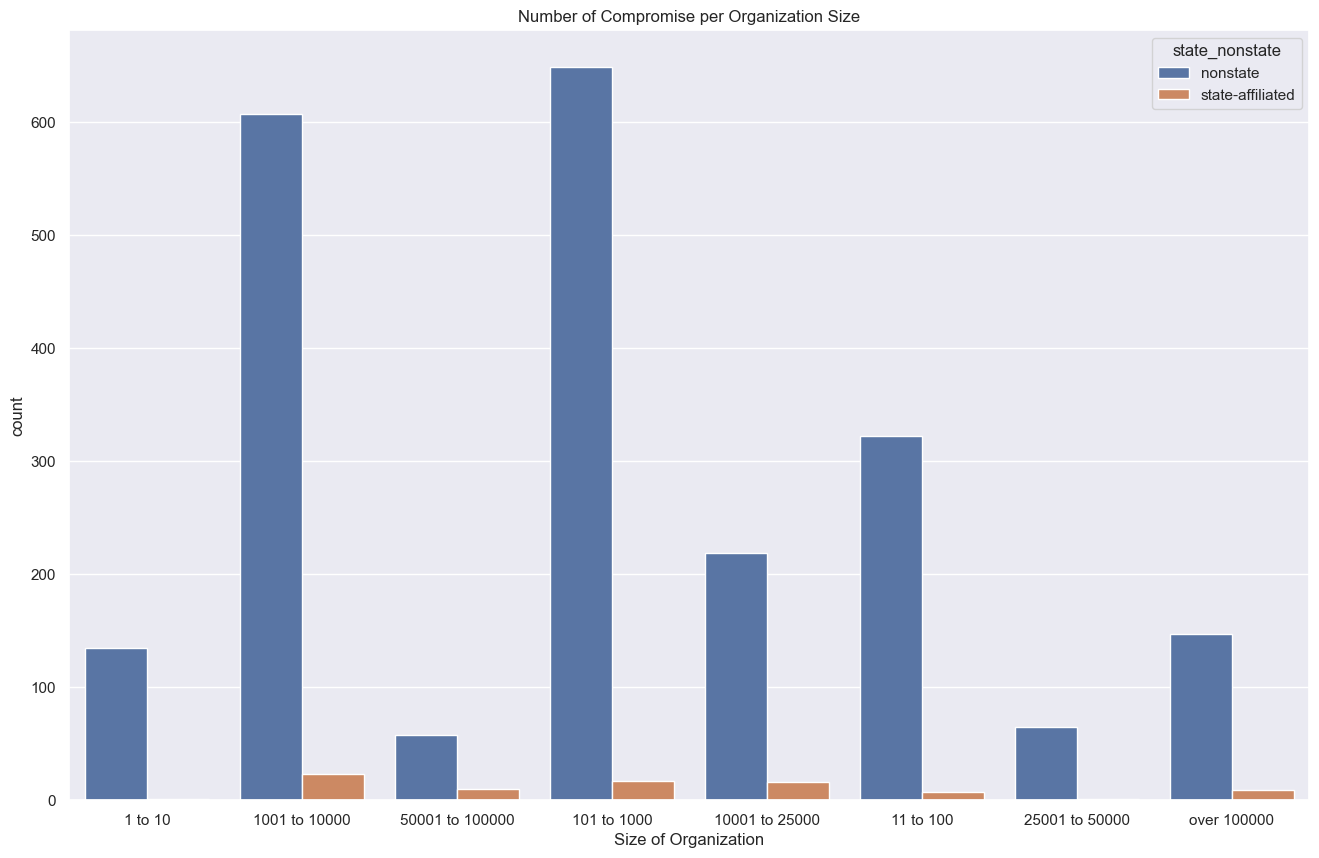

In [110]:
plt.figure(figsize=(16,10))
sns.countplot(x='employee_count', hue='state_nonstate', data=df)
plt.title('Number of Compromise per Organization Size')
plt.xlabel('Size of Organization')
plt.show()

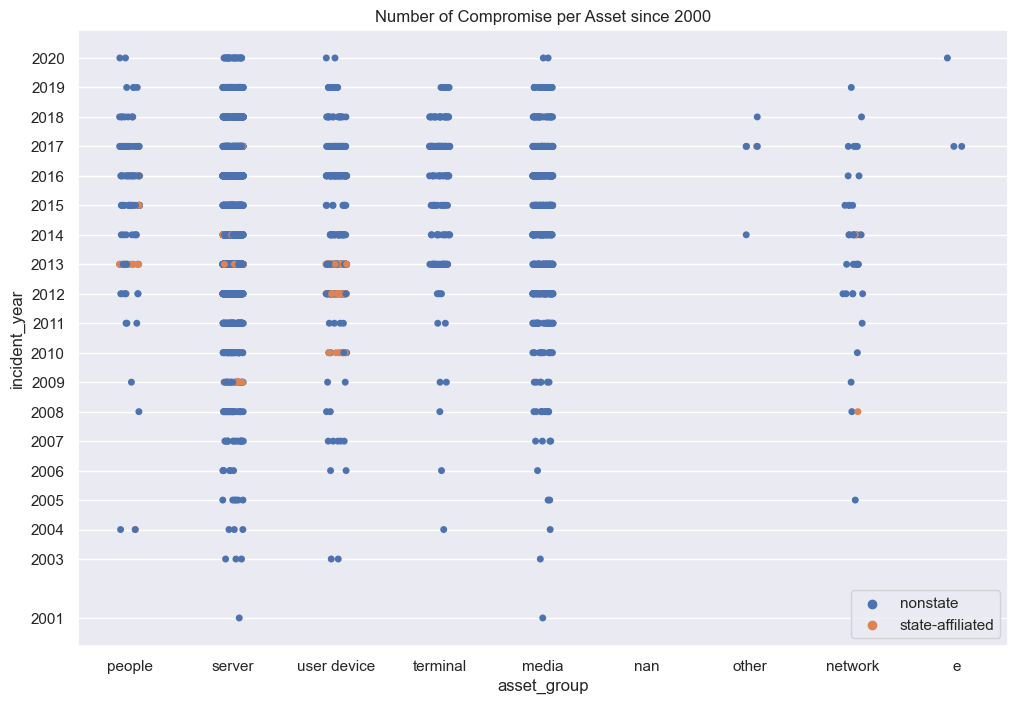

In [111]:
plt.figure(figsize=(12,8))
g=sns.stripplot(x= 'asset_group', y= 'incident_year', hue='state_nonstate' , data=df.loc[df.incident_year >2000])
g.set(yticks=[2001,2003,2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,2014,2015,2016,2017,2018,2019,2020])
plt.title('Number of Compromise per Asset since 2000')
plt.legend(loc='lower right')
plt.show()

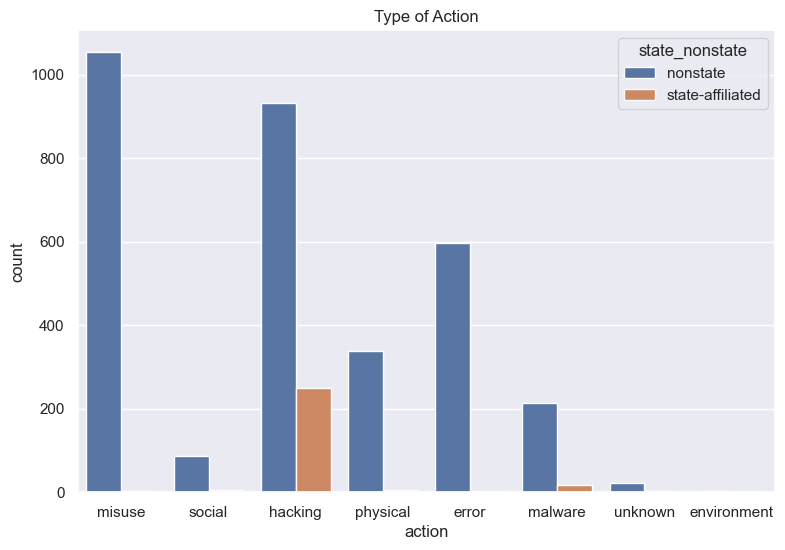

In [112]:
plt.figure(figsize=(9,6))
sns.countplot(x='action', hue='state_nonstate', data=df)
plt.title('Type of Action')

plt.show()

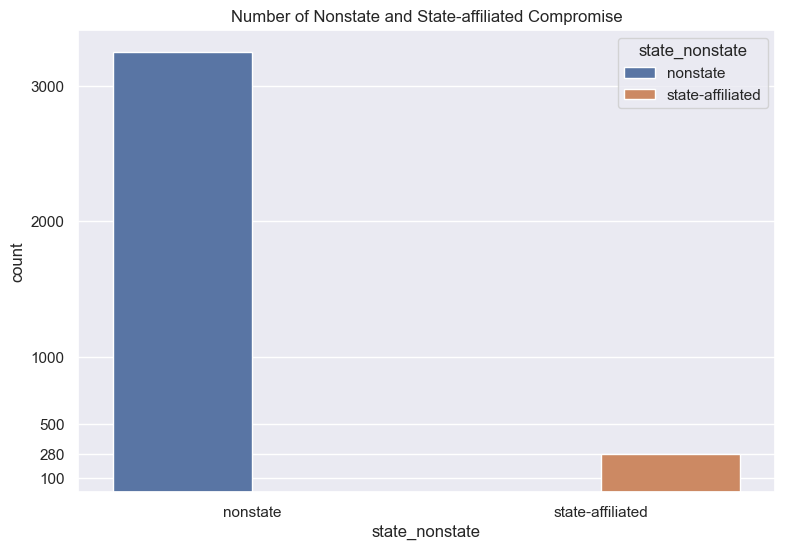

In [113]:
plt.figure(figsize=(9,6))
g = sns.countplot(x='state_nonstate', hue='state_nonstate', data=df)
g.set(yticks=[100,280,500, 1000, 2000, 3000])
plt.title('Number of Nonstate and State-affiliated Compromise')
plt.show()



In [114]:
country = df.groupby(by=['country'])[['state_nonstate']].count().reset_index()
country['num_attacks'] = country['state_nonstate']
country.drop('state_nonstate', axis=1, inplace=True)

In [115]:
country.head()

,country,num_attacks
0,Afghanistan,2
1,Albania,2
2,Algeria,1
3,Antigua and Barbuda,1
4,Argentina,8


In [116]:
merged_df = country.merge(df[['code','country']] , on='country', how='left')

country = merged_df.drop_duplicates()

In [117]:
country = country.reset_index()

In [118]:
country.drop('index', axis=1, inplace=True)

In [119]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   country      133 non-null    object
 1   num_attacks  133 non-null    int64 
 2   code         133 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.2+ KB


In [120]:

fig = go.Figure(data=go.Choropleth(
    locations = country['country'],
    z = country['num_attacks'].astype(int),
    locationmode = 'country names',
    colorscale = 'turbo',
    autocolorscale=False,
    reversescale=False,
    zmin=0,  # minimum value for color scale
    zmax=1500,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    
    colorbar_title = 'Attacks per Country',
))

fig.update_layout(
    title_text='Attacks Per Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
        annotations = [dict(
        x=0.55,
        y=0.001,
        xref='paper',
        yref='paper',
        text='Cyber-attacks worldwide',
        showarrow = False
    )]
)

fig.show()

# Data Munging 

In [121]:
cols_drop= ['victim','revenue',
                        'notification_year','total_monetary_impact']

df.drop(cols_drop, axis=1, inplace=True)

## Transforming rare categorical values into “Other” 

In [122]:
# columns to revise to reduce the dimensionality, the the frequenucy will be 0,05
cols = [ 'v_state' ,'v_country', 'industry', 'compromise_variety_1', 'action', 'action_variety','action_vector','asset_group','asset_variety_1']
                         

In [123]:
df.head()

,incident_id,v_country,code,country,v_state,industry,employee_count,incident_year,security_attribute,compromise_variety_1,compromise_variety_2,confidentiality_state,data_type,confidence,data_disclosure,action,action_variety,action_vector,state_nonstate,asset_group,asset_variety_1,confidentiality_data_total,t_impact_hours,t_discovery_hours,t_containment_hours,t_exfiltration_hours,t_compromise_hours
0,0000617d-276e-4aae-9787-08d1c7eb1afb,US,USA,United States,KY,retail trade,1 to 10,2015,confidentiality,fraudulent transaction,NaN,NaN,pii,low,NaN,misuse,privilege abuse,lan access,nonstate,people,unknown,NaN,0.00,NaN,NaN,0.00,0.00
3,000ab490-a4a9-11e8-b571-7db57cad93dd,US,USA,United States,GA,education,1001 to 10000,2017,confidentiality,alter behavior,data loss,stored,phi,high,yes,social,phishing,email,nonstate,server,email,417024.00,0.00,7200.00,NaN,NaN,NaN
9,00224226-4a39-435c-bffd-672b5d61c7c1,AZ,AZE,Azerbaijan,NaN,utilities,NaN,2013,availability,loss,NaN,unknown,org,high,yes,hacking,NaN,web application,nonstate,server,web application,NaN,NaN,NaN,NaN,NaN,NaN
11,0033ec30-c25d-11e8-bf07-99bafabab839,US,USA,United States,PA,healthcare,1001 to 10000,2018,confidentiality,data loss,NaN,NaN,phi,low,yes,misuse,knowledge abuse,physical access,nonstate,server,database,1.00,0.00,169.00,NaN,0.00,0.00
12,970c7583-bf9d-4f8a-954e-bbf714b87cbc,BR,BRA,Brazil,NaN,government,NaN,2013,integrity,modify data,defacement,NaN,NaN,NaN,NaN,hacking,NaN,web application,nonstate,server,web application,NaN,0.00,NaN,NaN,NaN,NaN


In [124]:
#finding the thresholds to group rare categorical values that consist of the lower 5%
def revise(df, cols):
    for col in cols:
        frequencies = df[col].value_counts(normalize=True, ascending=True)
        threshold = frequencies[(frequencies.cumsum() > 0.05).idxmax()]
        df[col] = df[col].mask(df[col].map(df[col].value_counts(normalize=True)) < threshold, 'other')
    return df

In [125]:
df = revise(df, cols)

In [126]:
df.v_country.value_counts()

US       2158
GB        244
CA        175
other     150
IN         91
AU         75
NZ         43
CN         35
KR         31
JP         30
IL         30
DE         28
IE         27
TR         18
RU         18
UA         15
PK         13
TW         13
FR         13
PH         12
TH         12
BE         11
ES         11
AE         11
SG         11
NL         10
SY         10
BR          9
ZA          9
KE          9
CH          9
IT          8
AR          8
BD          7
CK          7
MX          7
MY          6
HK          6
EG          6
AM          6
PE          6
DK          6
AZ          6
IR          6
LT          5
KZ          5
SE          5
UM          5
ID          5
VE          5
CZ          5
Name: v_country, dtype: int64

In [127]:
df.action_variety.value_counts()

privilege abuse           618
ransomware                163
possession abuse          160
exploit vuln              149
misdelivery               143
theft                     138
publishing error          130
skimmer                   124
other                     123
misconfiguration          108
use of backdoor or c2      96
dos                        92
data mishandling           89
use of stolen creds        87
knowledge abuse            87
phishing                   54
tampering                  54
sqli                       53
loss                       43
unknown                    36
disposal error             36
carelessness               32
brute force                27
programming error          24
pretexting                 24
lan access                 22
physical access            21
backdoor                   18
c2                         16
malfunction                15
forced browsing            12
omission                   12
unapproved hardware        11
ram scrape

In [128]:
# columns to numeric
columns_to_numeric = ['employee_count', 'confidence']

mapping = {'1 to 10': 10, '11 to 100':100,'101 to 1000':1000,
            '1001 to 10000':10000, '10001 to 25000':25000,
            '25001 to 50000':50000, '50001 to 100000':100000,
             'over 100000':500000}

df['n_employee'] = df.employee_count.map(mapping)


mapping2 = {'low':10, 'medium':100, 'high':1000}

df['n_confidence'] = df.confidence.map(mapping2)

### Filling NaN values

In [129]:
#filling the data type column based on industry

df["data_type"] = df.apply(lambda row: 
    {
        "healthcare": "phi",
        "finance and insurance": "pii",
        "government": "org"
    }.get(row["industry"], "pii") if pd.isna(row["data_type"]) else row["data_type"],
    axis=1)

In [130]:
#filling NaN values with Mode
cats_to_mode = ['industry','confidentiality_state','data_disclosure' ]

for col in cats_to_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [131]:
# fill with unknown
cats_to_unk = ['action','action_variety','action_vector', 'asset_group', 'asset_variety_1','compromise_variety_1']

for col in cats_to_unk:
    df[col].fillna('unknown', inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 0 to 8586
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incident_id                 3533 non-null   object 
 1   v_country                   3451 non-null   object 
 2   code                        3451 non-null   object 
 3   country                     3451 non-null   object 
 4   v_state                     1962 non-null   object 
 5   industry                    3533 non-null   object 
 6   employee_count              2286 non-null   object 
 7   incident_year               3533 non-null   int64  
 8   security_attribute          3533 non-null   object 
 9   compromise_variety_1        3533 non-null   object 
 10  compromise_variety_2        371 non-null    object 
 11  confidentiality_state       3533 non-null   object 
 12  data_type                   3533 non-null   object 
 13  confidence                  1440 

In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
incident_year,3533.00,2014.19,2.80,1994.00,2013.00,2014.00,2016.00,2020.00
confidentiality_data_total,1499.00,9752364.94,117860609.29,0.00,20.00,850.00,20113.50,4000000000.00
t_impact_hours,3192.00,17.83,528.07,0.00,0.00,0.00,0.00,26400.00
t_discovery_hours,928.00,6590.17,17009.34,0.00,11.00,336.00,4320.00,262800.00
t_containment_hours,401.00,1256.52,7869.42,0.00,24.00,106.00,156.00,87600.00
t_exfiltration_hours,459.00,72.48,682.65,0.00,0.00,0.00,0.00,8760.00
t_compromise_hours,596.00,57.21,503.58,0.00,0.00,0.00,0.00,8760.00
n_employee,2286.00,44171.15,124811.19,10.00,1000.00,10000.00,10000.00,500000.00
n_confidence,1440.00,715.75,427.15,10.00,100.00,1000.00,1000.00,1000.00


In [134]:
# fill with -1
num_to_fill = ['t_impact_hours', 't_discovery_hours', 't_containment_hours', 't_exfiltration_hours',
                   't_compromise_hours']

for col in num_to_fill:
    df[col].fillna(-1, inplace=True)

In [135]:
#filling with mean
df.confidentiality_data_total.fillna(df.confidentiality_data_total.mean(), inplace=True)

In [136]:
# fill the values with median
cols = ['n_employee','n_confidence']

for col in cols:
    df[col].fillna(df[col].median() , inplace=True)

In [137]:
df.compromise_variety_2.fillna('Not applicable', inplace=True)

In [138]:
df.drop(['employee_count','confidence','code','country','v_state','incident_year'], axis=1, inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3533 entries, 0 to 8586
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   incident_id                 3533 non-null   object 
 1   v_country                   3451 non-null   object 
 2   industry                    3533 non-null   object 
 3   security_attribute          3533 non-null   object 
 4   compromise_variety_1        3533 non-null   object 
 5   compromise_variety_2        3533 non-null   object 
 6   confidentiality_state       3533 non-null   object 
 7   data_type                   3533 non-null   object 
 8   data_disclosure             3533 non-null   object 
 9   action                      3533 non-null   object 
 10  action_variety              3533 non-null   object 
 11  action_vector               3533 non-null   object 
 12  state_nonstate              3533 non-null   object 
 13  asset_group                 3533 